In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
df = pd.read_csv('turkiye-student-evaluation_generic.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


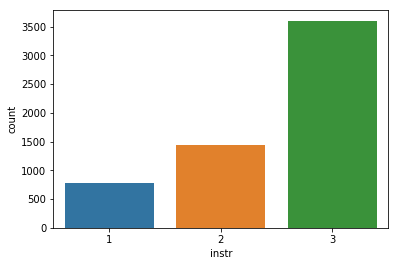

In [4]:
sns.countplot(df['instr'])

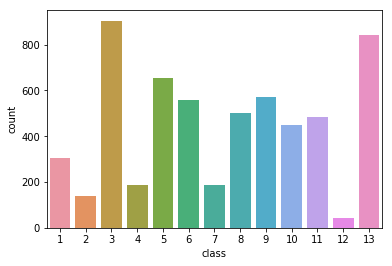

In [9]:
sns.countplot(df['class'])

In [8]:
df.groupby('class').instr.value_counts()

class  instr
1      2        303
2      1        140
3      3        904
4      3        187
5      3        656
6      2        558
7      1        187
8      3        500
9      3        571
10     1        448
11     2        484
12     3         41
13     3        742
       2         99
Name: instr, dtype: int64

In [7]:
X = df.iloc[:,5:].values
X.shape

(5820, 28)

In [10]:
#Since it is high dimensional, we use PCA to reduce dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
explained = pca.explained_variance_ratio_
print(explained)

[0.82198145 0.04515671 0.01460073 0.0128483  0.01036074]


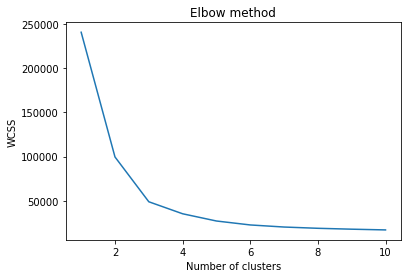

In [11]:
#Method 1: K-Means Clustering
#Using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [12]:
#Fitting k-means to the dataset
kmeans = KMeans(n_clusters = 3,init = 'k-means++')
y_kmeans = kmeans.fit_predict(X_pca)

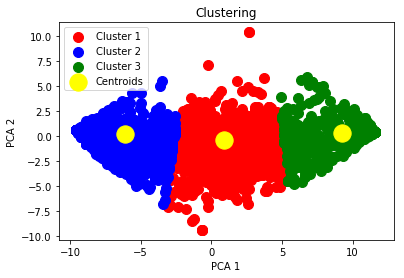

In [13]:
#Visualising clusters
plt.scatter(X_pca[y_kmeans ==0,0],X_pca[y_kmeans ==0,1],s=100, c='red',label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans ==1,0],X_pca[y_kmeans ==1,1],s=100, c='blue',label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans ==2,0],X_pca[y_kmeans ==2,1],s=100, c='green',label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [12]:
# check the number of observations belonged to each cluster with PCA
import collections
print(collections.Counter(y_kmeans))

Counter({2: 2358, 0: 2222, 1: 1240})


In [13]:
kmeans2 = KMeans(n_clusters = 3)
kmeans2 = kmeans2.fit(X)

y_final = kmeans2.predict(X)


In [14]:
## check the number of observations belonged to each cluster with PCA

print(collections.Counter(y_final))

Counter({2: 2358, 1: 2223, 0: 1239})


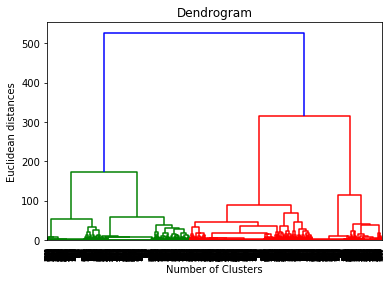

In [15]:
#Method 2: Aggolomerative Clustering
#Using dendograms to find optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Number of Clusters')
plt.ylabel('Euclidean distances')
plt.show()


In [16]:
#Fitting hierarchial clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X_pca)

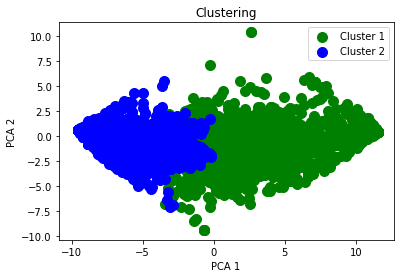

In [17]:
#Visualising clusters
plt.scatter(X_pca[y_hc ==0,0],X_pca[y_hc ==0,1],s=100, c='green',label = 'Cluster 1')
plt.scatter(X_pca[y_hc ==1,0],X_pca[y_hc ==1,1],s=100, c='blue',label = 'Cluster 2')

plt.title('Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [18]:
# check the number of observations belonged to each cluster with PCA
print(collections.Counter(y_hc))

Counter({0: 3334, 1: 2486})


In [19]:
hc2 = AgglomerativeClustering(n_clusters = 2,affinity ='euclidean',linkage ='ward')
hc2.fit(X)
y_main = hc2.fit_predict(X)


In [20]:
print(collections.Counter(y_main))

Counter({0: 3305, 1: 2515})
